In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
variables = ['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
headers = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
data = pd.read_csv('data.csv', names=headers)

## Exercise 1 - Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset

In [3]:
sex_counts = data['sex'].value_counts()
sex_counts_df = pd.DataFrame(index=sex_counts.index, data=sex_counts.values, columns=['count'])
total_count = sex_counts_df['count'].sum()
sex_counts_df['%'] = ((sex_counts_df['count'] / total_count) * 100).round(2)
sex_counts_df = sex_counts_df.rename(index={'M': 'Male', 'F': 'Female', 'I': 'Infant'})
sex_counts_df.index.name = None
sex_counts_df

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


## Exercise 2 - Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset

In [4]:
statistics = data.describe().T.drop(columns='count')
statistics

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


## Exercise 3 - Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset

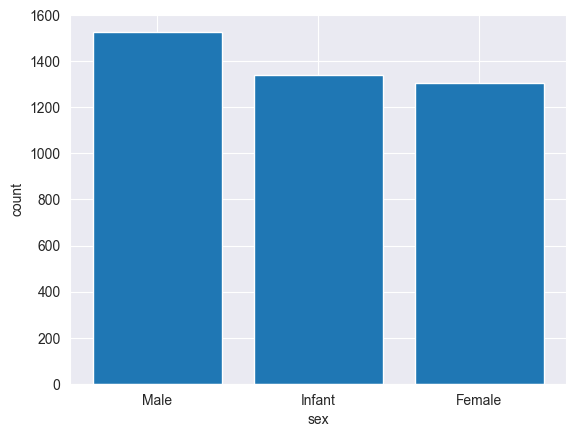

In [5]:
plt.bar(sex_counts_df.index, sex_counts_df['count'])
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

## Exercise 4 - Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns

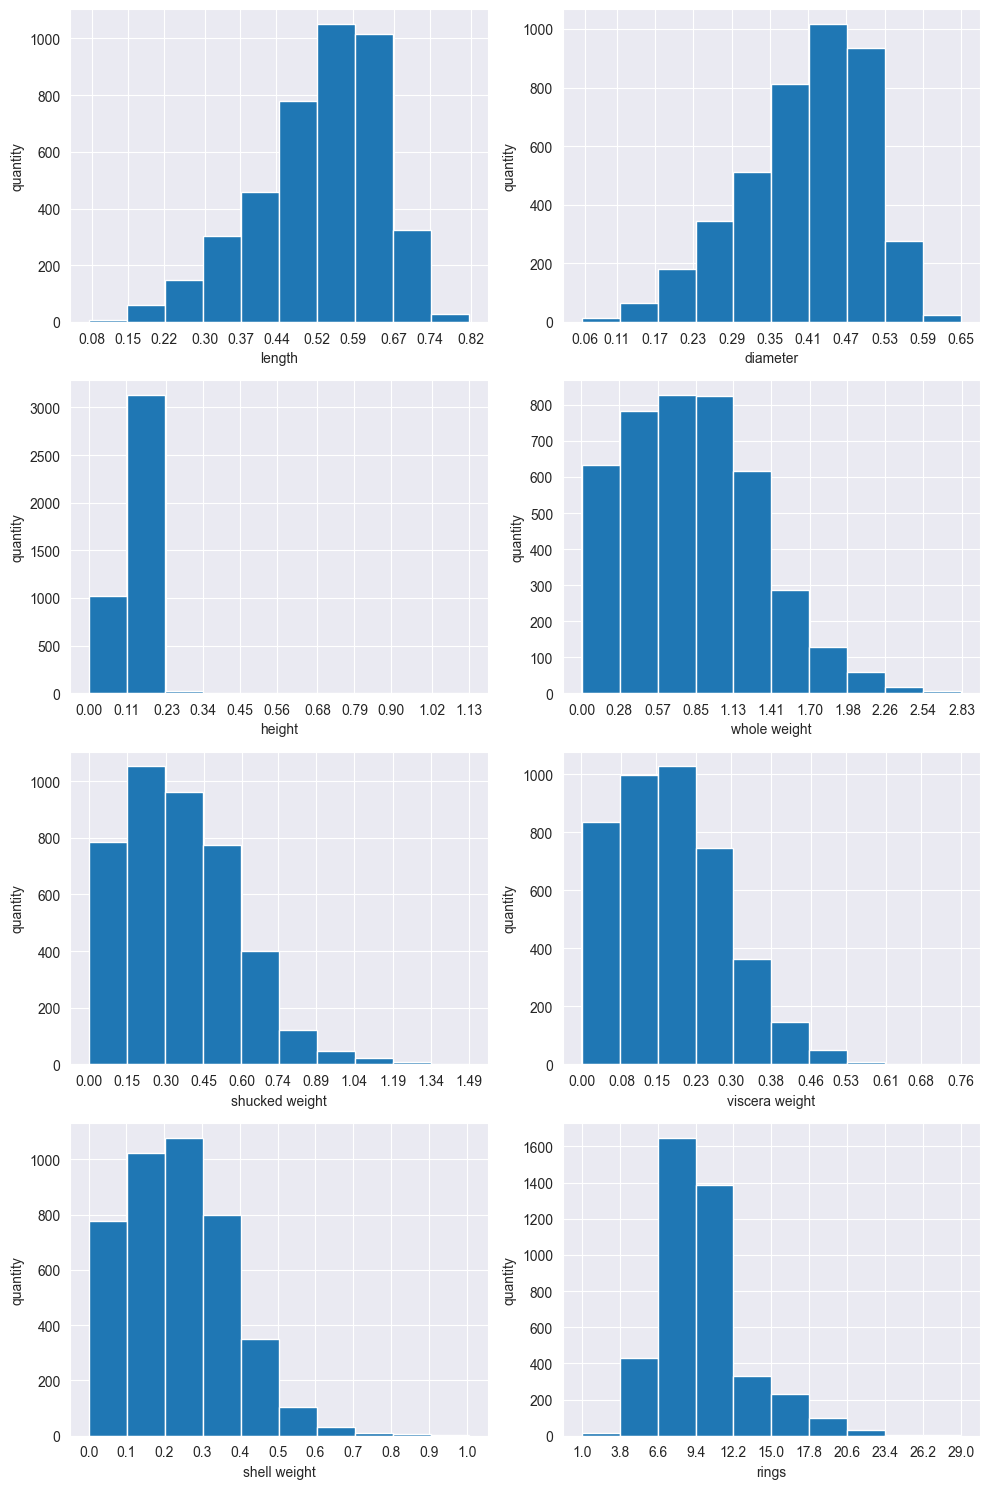

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
ax = ax.flatten()

for i, var in enumerate(variables):
    _, bin_edges, _ = ax[i].hist(data[var])
    ax[i].set_xlabel(var)
    ax[i].set_xticks(bin_edges.round(2))
    ax[i].set_ylabel('quantity')

plt.tight_layout()
plt.show()

## Exercise 5 - Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset

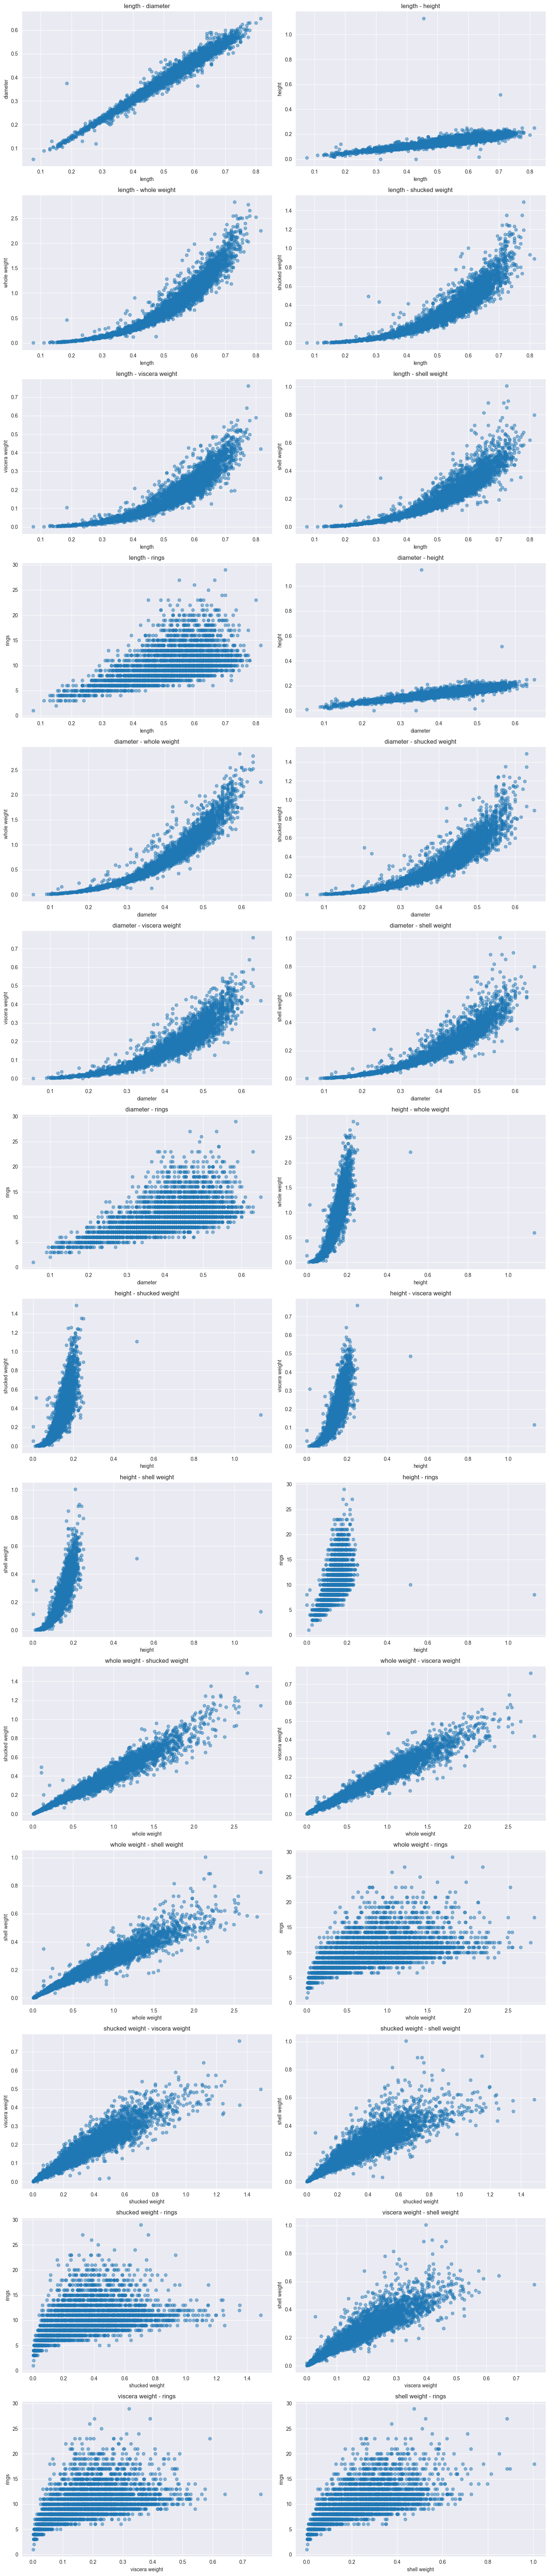

In [7]:
num_vars = len(variables)
fig, ax = plt.subplots(nrows=14, ncols=2, figsize=(15, 70))
ax = ax.flatten()

count = 0

for i in range(num_vars):
    for j in range(i + 1, num_vars):
        x_var = variables[i]
        y_var = variables[j]
        ax[count].scatter(data[x_var], data[y_var], alpha=0.5)
        ax[count].set_xlabel(x_var)
        ax[count].set_ylabel(y_var)
        ax[count].set_title(f'{x_var} - {y_var}')
        count += 1
        
fig.tight_layout()
plt.show()

## Exercise 6 - Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset

In [8]:
correlation_matrix = data.iloc[:, 1:].corr()
correlation_matrix

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## Exercise 7 - Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset

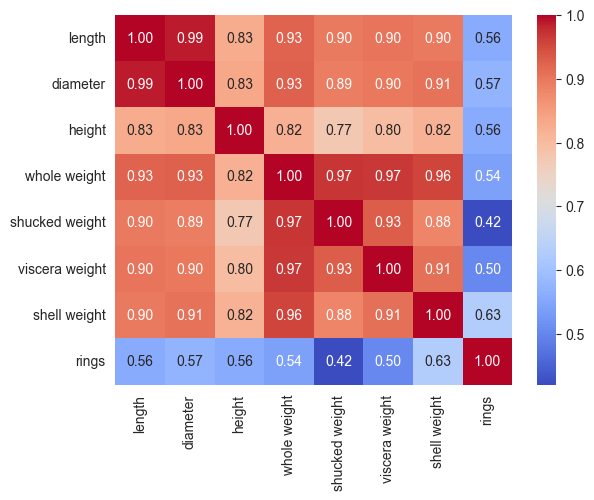

In [9]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f');

## Exercise 8 - Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded)

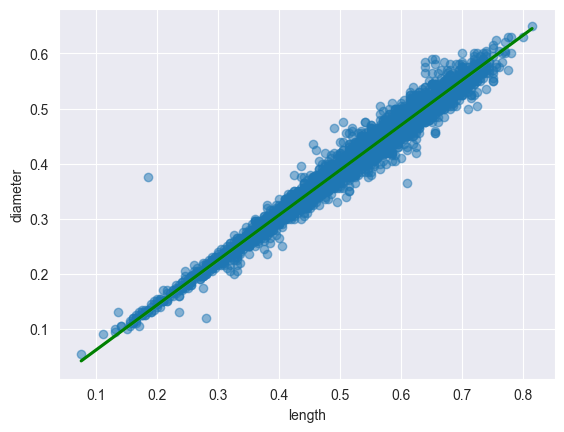

In [10]:
sns.regplot(x='length', y='diameter', data=data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'g'});